In [1]:
import pandas as pd
import numpy as np

In [2]:
fm1 = pd.read_csv('assignment1_dataset.csv', sep=',')
#fm1_pd = pd.DataFrame(fm1.data)
#fm1.head() -> display only first 5
#print(fm1.to_string()) -> print whole data
fm1.head()

,f1,f2,f3,f4,f5,response
0,-0.764216,-1.016209,0.149410,-0.050119,-0.578127,6.242514
1,0.763880,-1.159509,-0.721492,-0.654067,-0.431670,-8.118241
2,0.519329,-0.664621,-1.694904,1.339779,0.182764,66.722455
3,-0.177388,0.515623,0.135144,-0.647634,-0.405631,-27.716793
4,0.104022,0.749665,-0.939338,-0.090725,-0.639963,8.192075


In [3]:
fm1.describe()

,f1,f2,f3,f4,f5,response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.012255,-0.043030,-0.065785,0.039616,0.008074,11.229435
std,0.998816,1.042413,0.982640,1.023960,1.006679,40.028188
min,-3.174809,-3.381691,-3.158010,-2.764936,-2.946633,-103.044475
25%,-0.655282,-0.759477,-0.734505,-0.660802,-0.685371,-16.580272
50%,-0.001177,-0.038444,-0.049838,-0.006831,-0.000368,10.554227
75%,0.697331,0.696343,0.591642,0.737806,0.710398,38.485118
max,3.092866,3.534175,3.406115,3.145835,3.007734,157.890314


In [4]:
print(fm1.keys())

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'response'], dtype='object')


In [5]:
corr_matrix = fm1.corr()
corr_matrix['response'].sort_values(ascending=True)

f2         -0.031751
f5         -0.028999
f3          0.015218
f1          0.308474
f4          0.947255
response    1.000000
Name: response, dtype: float64

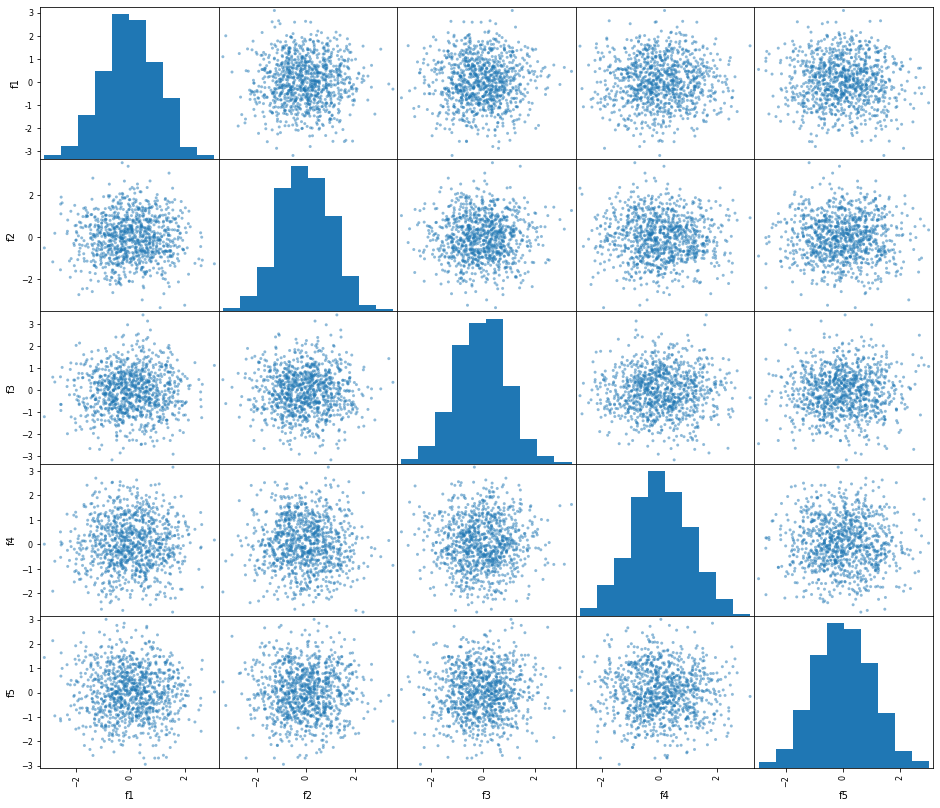

In [6]:
# visualizing data
from matplotlib import pyplot as plot
from pandas.plotting import scatter_matrix

attr = ['f1','f2','f3','f4','f5']
scatter_matrix(fm1[attr], figsize=(16,14))
plot.show()

Text(0.5, 1.0, 'relationship f4 & response')

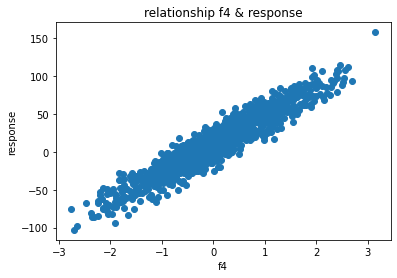

In [7]:
# let's plot f4 & response, cuz f4 corr is close to 1
from matplotlib import pyplot as plt
plt.scatter(fm1.f4, fm1.response)
plt.xlabel('f4')
plt.ylabel('response')
plt.title('relationship f4 & response')

In [8]:
columns = ['f1','f2','f3','f4','f5','response']
fm1 = fm1.loc[:, columns]
fm1.head()

,f1,f2,f3,f4,f5,response
0,-0.764216,-1.016209,0.149410,-0.050119,-0.578127,6.242514
1,0.763880,-1.159509,-0.721492,-0.654067,-0.431670,-8.118241
2,0.519329,-0.664621,-1.694904,1.339779,0.182764,66.722455
3,-0.177388,0.515623,0.135144,-0.647634,-0.405631,-27.716793
4,0.104022,0.749665,-0.939338,-0.090725,-0.639963,8.192075


In [9]:
# least square linear regression
from sklearn.model_selection import train_test_split
features = ['f1','f2','f3','f4','f5']
X = fm1.loc[:, features]
y = fm1.loc[:, ['response']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.8)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 5)
(800, 1)
(200, 5)
(200, 1)


In [10]:
from sklearn.linear_model import LinearRegression
reg_ls = LinearRegression()

In [11]:
reg_ls.fit(X_train, y_train)
reg_ls.score(X_train, y_train)

0.9846734030851435

In [12]:
print('Estimated intercept coefficients: ', reg_ls.intercept_)
print('Number of coefficients: ', len(reg_ls.coef_))
print('Coefficients: ', reg_ls.coef_)

Estimated intercept coefficients:  [9.62875836]
Number of coefficients:  1
Coefficients:  [[ 1.16593501e+01 -9.32274124e-03  2.44917050e-01  3.69639916e+01
   1.46404942e-01]]


In [13]:
reg_ls.predict(X_test)[0:10]

array([[  2.57873625],
       [ 55.23033201],
       [  6.19281207],
       [-46.11780731],
       [-11.2689122 ],
       [ 34.89559355],
       [ 17.95464285],
       [-56.5558666 ],
       [-45.08271559],
       [ -1.95977965]])

In [14]:
y_test[0:10]

,response
507,-0.223583
818,53.173508
452,-1.905123
368,-43.951402
242,-5.041251
929,40.097189
262,21.070512
810,-52.276465
318,-48.028814
49,3.614860


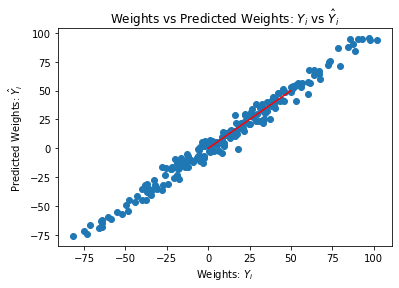

In [15]:
# Least Squares
y_pred_ls = reg_ls.predict(X_test)
# plot prediction and actual data
plt.scatter(y_test, y_pred_ls)
plt.xlabel('Weights: $Y_i$')
plt.ylabel('Predicted Weights: $\hat{Y}_i$')
plt.title('Weights vs Predicted Weights: $Y_i$ vs $\hat{Y}_i$')
# plot a line, a perfect prediction would all fall on this line
x = np.linspace(0, 50, 100)
y = x
plt.plot(x, y, 'r')

In [16]:
# Gradient Descent
from sklearn.linear_model import SGDRegressor
reg_gd = SGDRegressor(loss='huber', eta0=0.35, max_iter=5500,
early_stopping=False, tol=None, verbose=1, random_state=1)
reg_gd.fit(X_train, y_train)
y_pred_gd = reg_gd.predict(X_test)

C:\Users\Arya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-- Epoch 1
Norm: 5.61, NNZs: 5, Bias: 1.523575, T: 800, Avg. loss: 3.065166
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.43, NNZs: 5, Bias: 2.505467, T: 1600, Avg. loss: 2.688575
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 12.75, NNZs: 5, Bias: 3.385791, T: 2400, Avg. loss: 2.385092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 15.76, NNZs: 5, Bias: 4.175595, T: 3200, Avg. loss: 2.115416
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 18.54, NNZs: 5, Bias: 4.941385, T: 4000, Avg. loss: 1.870060
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 21.15, NNZs: 5, Bias: 5.684649, T: 4800, Avg. loss: 1.643108
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 23.61, NNZs: 5, Bias: 6.307008, T: 5600, Avg. loss: 1.433363
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 25.95, NNZs: 5, Bias: 6.894215, T: 6400, Avg. loss: 1.238015
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 28.15, NNZs: 5, Bias: 7.418548, T: 7200, Avg. loss: 1.056737
Total training time: 

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test, y_pred_gd))
print(mean_squared_error(y_test, y_pred_gd))
print(r2_score(y_test, y_pred_gd))

4.085299367785218
26.365084049116348
0.9828228941418379


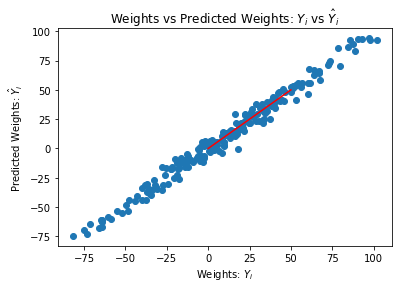

In [18]:
plt.scatter(y_test, y_pred_gd)
plt.xlabel('Weights: $Y_i$')
plt.ylabel('Predicted Weights: $\hat{Y}_i$')
plt.title('Weights vs Predicted Weights: $Y_i$ vs $\hat{Y}_i$')
# plot a line, a perfect prediction would all fall on this line
x = np.linspace(0, 50, 100)
y = x
plt.plot(x, y, 'r')